Electric Propulsion Test Code #1

In [1]:
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np

Inputs

In [2]:
data = pd.read_excel('Electric_Rockets_and_Solar_Panels.xlsx')
# based on the excel choose the row location of the one you want
iont = 3
hallt = 0
solarp = 6
# choose the amount of Ion and Hall thrusters
ionnumber = 1
hallnumber = 1
# choose the weight of the spacecraft
totalweight = 900000

In [3]:
# From Solar Panels
pp = data.iloc[solarp,1] # power per panel
spweight = data.iloc[solarp,2] # solar panel weight
paneleff = data.iloc[solarp,3] # this is in kW/m^3
panelnumber = 1 # choose the number of panels

In [4]:
# From Ion Thruster Chosen
ionisp = data.iloc[iont,1] # in s
ionthrust = data.iloc[iont,6]*(10**-3) # in mN so converting to N
ioneff = data.iloc[iont,3] # in %
ionfuelmw = data.iloc[iont,4] 
ionweight = data.iloc[iont,5] # in kg

# From Hall Thruster Chosen 
hallisp = data.iloc[hallt,1] # in s
hallthrust = data.iloc[hallt,6]*(10**-3) # in mN so converting to N
halleff = data.iloc[hallt,3] # in %
hallfuelmw = data.iloc[hallt,4] 
hallweight = data.iloc[hallt,5] # in kg

Electric Prop Equations

In [62]:
ge = 9.81 # earth gravity
a = 7.34 # q/m for xenon got it from the book (10^5 C/kg)
# Ion Thrusters
ionVa = ((ionisp*ge)**2)/(2*(ge/ionfuelmw))
ionEP = (ionthrust*ionisp*ge)/(2*ioneff)
ionI = ionEP/ionVa
ionUe = (2*a*ionVa)/ionfuelmw
ionmdot = (2*ionEP)/(ionUe**2)
# Hall Thrusters
hallVa = ((hallisp*ge)**2)/(2*(ge/hallfuelmw))
hallEP = (hallthrust*hallisp*ge)/(2*halleff)
hallI = hallEP/hallVa
hallUe = (2*a*hallVa)/hallfuelmw
hallmdot = (2*hallEP)/(hallUe**2)
print(f"Ion Thruster Electric Power (ionEP): {ionEP*10**-3} kW")
print(f"Hall Thruster Electric Power (hallEP): {hallEP*10**-3} kW")

Ion Thruster Electric Power (ionEP): 6.928943142857144 kW
Hall Thruster Electric Power (hallEP): 109.31142857142859 kW


Get the Thrust

In [45]:
time = np.arange(0, 120)
ones_array = np.ones((120, 1))
# Choose how often hall thrusters are used in hours
halltime = 24 # in hours (so it fires once every hour right now)
# Ion total Thrust
iontotalthrust = ionthrust*ionnumber*ones_array

# Hall total Thrust
halltotalthrust = hallthrust*hallnumber*ones_array
#*time*halltime
# Total Thrust
totalthrust = (iontotalthrust + halltotalthrust)*ones_array

Get the Acceleration of the Spacecraft

In [46]:
# total weight of spacecraft
totalweight = totalweight+(ionweight*ionnumber)+(hallweight*hallnumber)

t = np.full((120, 1), totalweight)
# Ion total Accceleration
iontotalaccel = iontotalthrust/t
# Hall total Acceleration
halltotalaccel = halltotalthrust/t
# Total Acceleration
totalaccel = iontotalaccel+halltotalaccel

Get the Speed of the Spacecraft

In [47]:
initialv0 = 0 
# Ion total Speed
iontotalspeed =iontotalaccel*ionnumber*time*60*60*24
iontotalspeed = iontotalspeed.T
iontotalspeed= iontotalspeed[:,0]
# Hall total Speed
halltotalspeed = halltotalaccel*hallnumber*time*halltime
halltotalspeed = halltotalspeed.T
halltotalspeed = halltotalspeed[:,0]
# Total Speed
totalspeed = initialv0 + (iontotalspeed + halltotalspeed)

Cost

In [54]:
xenoncost = 5000 # in $/kg
# Ion total fuel cost
iontotalfuelcost = ionmdot*xenoncost*time*60*60*24
# Hall total fuel cost
halltotalfuelcost = hallmdot*xenoncost*time*halltime
# Total fuel cost
totalfuelcost = iontotalfuelcost + halltotalfuelcost

Graphs Against Time Depending on Number of Engines Chosen

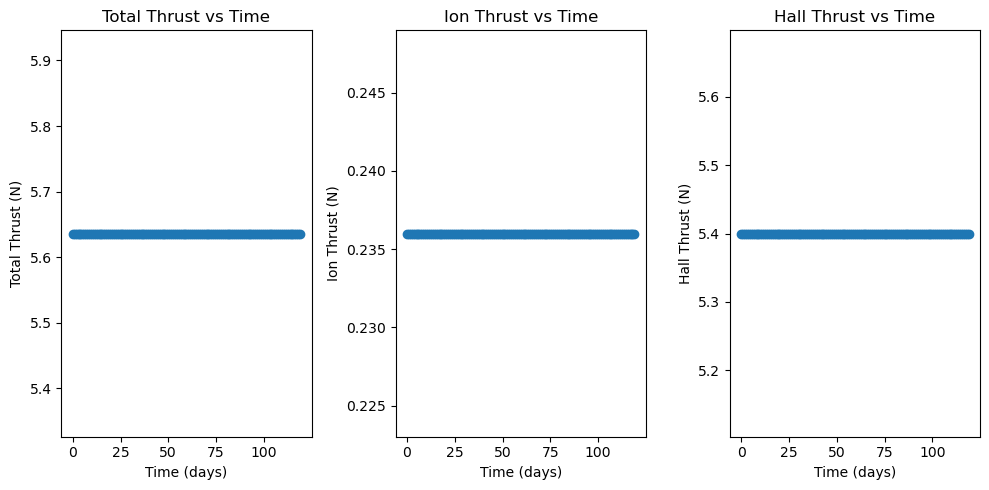

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Thrust
axs[0].scatter(time, totalthrust)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Thrust (N)')
axs[0].set_title('Total Thrust vs Time')

# Ion Thrust
axs[1].scatter(time, iontotalthrust)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Thrust (N)')
axs[1].set_title('Ion Thrust vs Time')

# Hall Thrust
axs[2].scatter(time, halltotalthrust)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Thrust (N)')
axs[2].set_title('Hall Thrust vs Time')

plt.tight_layout()
plt.show()

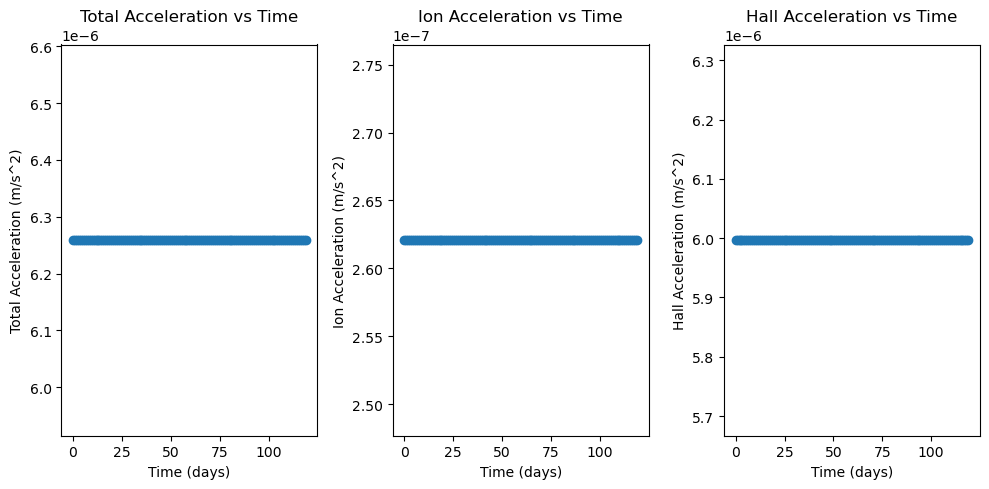

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Acceleration
axs[0].scatter(time, totalaccel)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Acceleration (m/s^2)')
axs[0].set_title('Total Acceleration vs Time')

# Ion Acceleration
axs[1].scatter(time, iontotalaccel)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Acceleration (m/s^2)')
axs[1].set_title('Ion Acceleration vs Time')

# Hall Acceleration
axs[2].scatter(time, halltotalaccel)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Acceleration (m/s^2)')
axs[2].set_title('Hall Acceleration vs Time')

plt.tight_layout()
plt.show()

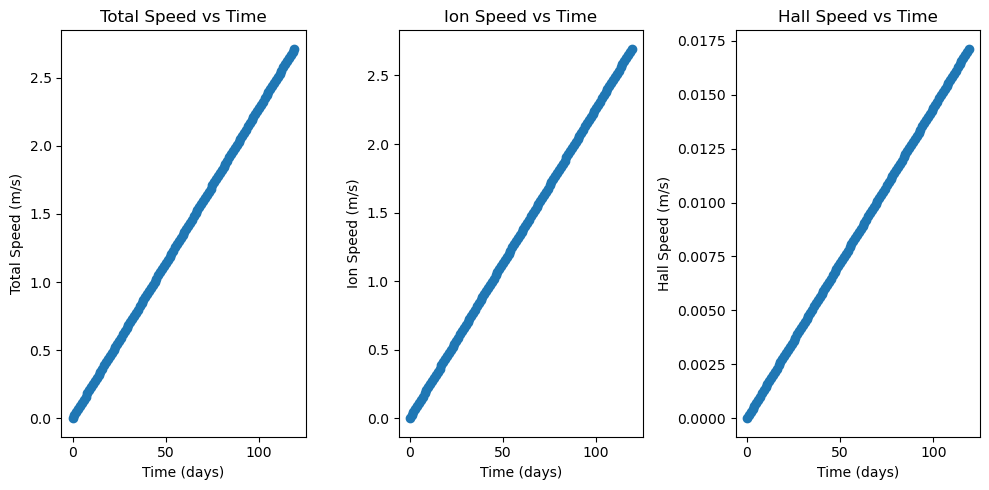

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Speed
axs[0].scatter(time, totalspeed)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Speed (m/s)')
axs[0].set_title('Total Speed vs Time')

# Ion Speed
axs[1].scatter(time, iontotalspeed)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Speed (m/s)')
axs[1].set_title('Ion Speed vs Time')

# Hall Speed
axs[2].scatter(time, halltotalspeed)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Speed (m/s)')
axs[2].set_title('Hall Speed vs Time')

plt.tight_layout()
plt.show()

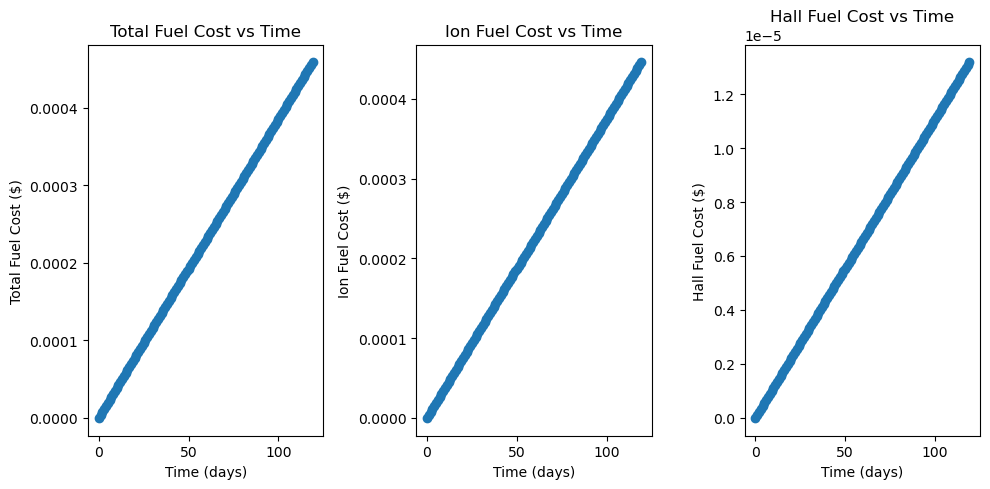

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Fuel Cost
axs[0].scatter(time, totalfuelcost)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Fuel Cost ($)')
axs[0].set_title('Total Fuel Cost vs Time')

# Ion Fuel Cost
axs[1].scatter(time, iontotalfuelcost)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Fuel Cost ($)')
axs[1].set_title('Ion Fuel Cost vs Time')

# Hall Fuel Cost
axs[2].scatter(time, halltotalfuelcost)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Fuel Cost ($)')
axs[2].set_title('Hall Fuel Cost vs Time')

plt.tight_layout()
plt.show()

In [51]:
linear_array = np.linspace(39.5, 19, 120).reshape(-1, 1)

[[39.5       ]
 [39.32773109]
 [39.15546218]
 [38.98319328]
 [38.81092437]
 [38.63865546]
 [38.46638655]
 [38.29411765]
 [38.12184874]
 [37.94957983]
 [37.77731092]
 [37.60504202]
 [37.43277311]
 [37.2605042 ]
 [37.08823529]
 [36.91596639]
 [36.74369748]
 [36.57142857]
 [36.39915966]
 [36.22689076]
 [36.05462185]
 [35.88235294]
 [35.71008403]
 [35.53781513]
 [35.36554622]
 [35.19327731]
 [35.0210084 ]
 [34.8487395 ]
 [34.67647059]
 [34.50420168]
 [34.33193277]
 [34.15966387]
 [33.98739496]
 [33.81512605]
 [33.64285714]
 [33.47058824]
 [33.29831933]
 [33.12605042]
 [32.95378151]
 [32.78151261]
 [32.6092437 ]
 [32.43697479]
 [32.26470588]
 [32.09243697]
 [31.92016807]
 [31.74789916]
 [31.57563025]
 [31.40336134]
 [31.23109244]
 [31.05882353]
 [30.88655462]
 [30.71428571]
 [30.54201681]
 [30.3697479 ]
 [30.19747899]
 [30.02521008]
 [29.85294118]
 [29.68067227]
 [29.50840336]
 [29.33613445]
 [29.16386555]
 [28.99159664]
 [28.81932773]
 [28.64705882]
 [28.47478992]
 [28.30252101]
 [28.13025